Import Imoprtant Libraries




In [79]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Read the questionnaire responses csv file


In [80]:
df = pd.read_excel ('/content/Dass  Questionaries (Responses).xlsx')


In [25]:
df.head()

,Timestamp,City of Work,Age,Gender,Marital Status,Education level,Staff Type,Current working department,Living situation,I found it hard to relax after a long day.(S),I was aware of dryness of my mouth.(A),I couldn’t seem to experience any positive feeling at all. (D),"I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)(A)",I found it difficult to work up the initiative to do things.(D),I tended to over-react to situations.(S),I experienced trembling (e.g. in the hands)(A),felt that I was using a lot of nervous energy.(S),I was worried about situations in which I might panic and make a fool of myself.(A),I felt that I had nothing to look forward to.(D),I found myself getting agitated.(S),I found it difficult to relax.(S),I felt down-hearted and sad.(D),I was intolerant of anything that kept me from getting on with what I was doing.(S),I felt I was close to panic.(A),I was unable to become enthusiastic about anything.(D),I felt I wasn’t worth much as a person.(D),I felt that I was rather touchy.(S),"I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)(A)",I felt scared without any good reason.(A),I felt that life was meaningless.(D)
0,2020-11-12 19:27:12.680,Lahore,20-30,Male,Single,Bachelars,Paramedics,Medical ER,With Family,3,2,1,1,1,1,2,1,1,0,2,2,1,0,0,2,1,2,2,1,1
1,2020-11-12 19:27:18.520,rawat,40-50,Female,Married,Post Graduation,Doctor,Others,Hostel,2,1,1,0,3,2,0,1,3,1,0,3,0,3,2,3,0,0,0,0,0
2,2020-11-12 19:30:01.217,rawat,40-50,Male,Single,Post Graduation,Doctor,Isolation/Intensive care unit,Alone,3,0,3,0,0,2,0,3,0,3,2,0,0,3,0,0,3,0,3,0,2
3,2020-12-12 11:20:19.944,Lahore,20-30,Male,Married,PG Resident,Doctor,Surgical and allied,With Family,0,1,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-12-12 11:55:44.584,Lahore,20-30,Male,Single,PG Resident,Doctor,Medical ER,With Family,2,2,1,3,2,3,2,2,0,0,1,2,2,3,2,0,0,2,2,0,0


Analyze the data and remove the columns that do not contribute in statistical analysis, in this case it is the Date time column

In [81]:
df = df.drop('Timestamp', 1)

In [27]:
df.head()

,City of Work,Age,Gender,Marital Status,Education level,Staff Type,Current working department,Living situation,I found it hard to relax after a long day.(S),I was aware of dryness of my mouth.(A),I couldn’t seem to experience any positive feeling at all. (D),"I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)(A)",I found it difficult to work up the initiative to do things.(D),I tended to over-react to situations.(S),I experienced trembling (e.g. in the hands)(A),felt that I was using a lot of nervous energy.(S),I was worried about situations in which I might panic and make a fool of myself.(A),I felt that I had nothing to look forward to.(D),I found myself getting agitated.(S),I found it difficult to relax.(S),I felt down-hearted and sad.(D),I was intolerant of anything that kept me from getting on with what I was doing.(S),I felt I was close to panic.(A),I was unable to become enthusiastic about anything.(D),I felt I wasn’t worth much as a person.(D),I felt that I was rather touchy.(S),"I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)(A)",I felt scared without any good reason.(A),I felt that life was meaningless.(D)
0,Lahore,20-30,Male,Single,Bachelars,Paramedics,Medical ER,With Family,3,2,1,1,1,1,2,1,1,0,2,2,1,0,0,2,1,2,2,1,1
1,rawat,40-50,Female,Married,Post Graduation,Doctor,Others,Hostel,2,1,1,0,3,2,0,1,3,1,0,3,0,3,2,3,0,0,0,0,0
2,rawat,40-50,Male,Single,Post Graduation,Doctor,Isolation/Intensive care unit,Alone,3,0,3,0,0,2,0,3,0,3,2,0,0,3,0,0,3,0,3,0,2
3,Lahore,20-30,Male,Married,PG Resident,Doctor,Surgical and allied,With Family,0,1,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Lahore,20-30,Male,Single,PG Resident,Doctor,Medical ER,With Family,2,2,1,3,2,3,2,2,0,0,1,2,2,3,2,0,0,2,2,0,0


Look for null values in the dataset

In [82]:
df.isna().sum().sum()

0

In [29]:
df['City of Work']


0           Lahore
1            rawat
2            rawat
3           Lahore
4           Lahore
          ...     
127         multan
128         multan
129         multan
130            Rwp
131    Rawalpindi 
Name: City of Work, Length: 132, dtype: object

After analysisng the City of work column in our dataset it is found that different people used differetn spellings to speel their cities. Some paramedics used short form spellings of their cities. So it was normalized and standard spellings were used for each city

In [83]:
df['City of Work'] = df['City of Work'].replace(['multan', 'mulltan','Layyah','Kahror Pacca'], 'Multan')

In [84]:
df['City of Work'] = df['City of Work'].replace(['lahore', 'Lahorw', 'Lhr','Lahore '], 'Lahore')

In [85]:
df['City of Work'] = df['City of Work'].replace(['Rawalpindi ', 'Rawalpindi','Rawal pindi ','rawalpindu', 'Rwp','Rawalpi di', 'Pindi','Chakwal ','rawat'], 'Rawalpindi')

In [86]:
df['City of Work'] = df['City of Work'].replace(['Islambad ','Islamabad ', 'Isb','islamabad'], 'Islamabad')

In [87]:
df['City of Work'] = df['City of Work'].replace(['mirpur azad kashmir ', 'Bhimber  AJK'],'AJK')

In [88]:
df['City of Work'] = df['City of Work'].replace(['Sialkot ','Gujrat'], 'Sialkot')

In [89]:
df['City of Work'] = df['City of Work'].replace(['Khushab ', 'Sargodha '], 'Sargodha')

In [90]:
df['City of Work'] = df['City of Work'].replace(['Karachi '], 'Karachi')

In [91]:
df['City of Work'].unique()

array(['Lahore', 'Rawalpindi', 'Sialkot', 'Islamabad', 'Karachi',
       'Rahim Yar Khan', 'Peshawar', 'Sargodha', 'Multan', 'AJK'],
      dtype=object)

In [ ]:
# remaining cities 
# 'Rahim Yar Khan', 'Peshawar' 

In [92]:
df.columns

Index(['City of Work', 'Age', 'Gender', 'Marital Status', 'Education level',
       'Staff Type', 'Current working department', 'Living situation',
       'I found it hard to relax after a long day.(S)',
       'I was aware of dryness of my mouth.(A)',
       'I couldn’t seem to experience any positive feeling at all. (D)',
       'I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)(A)',
       'I found it difficult to work up the initiative to do things.(D)',
       'I tended to over-react to situations.(S)',
       'I experienced trembling (e.g. in the hands)(A)',
       ' felt that I was using a lot of nervous energy.(S)',
       'I was worried about situations in which I might panic and make a fool of myself.(A)',
       'I felt that I had nothing to look forward to.(D)',
       'I found myself getting agitated.(S)',
       'I found it difficult to relax.(S)', 'I felt down-hearted and sad.(D)',
       'I was into

In [93]:
df.rename(columns={'I found it hard to relax after a long day.(S)':'S1',
       'I was aware of dryness of my mouth.(A)':'A1',
       'I couldn’t seem to experience any positive feeling at all. (D)':'D1',
       'I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)(A)':'A2',
       'I found it difficult to work up the initiative to do things.(D)':'D2',
       'I tended to over-react to situations.(S)':'S2',
       'I experienced trembling (e.g. in the hands)(A)':'A3',
       ' felt that I was using a lot of nervous energy.(S)':'S3',
       'I was worried about situations in which I might panic and make a fool of myself.(A)':'A4',
       'I felt that I had nothing to look forward to.(D)':'D3',
       'I found myself getting agitated.(S)':'S4',
       'I found it difficult to relax.(S)':'S5', 'I felt down-hearted and sad.(D)':'D4',
       'I was intolerant of anything that kept me from getting on with what I was doing.(S)':'S6',
       'I felt I was close to panic.(A)':'A5',
       'I was unable to become enthusiastic about anything.(D)':'D5',
       'I felt I wasn’t worth much as a person.(D)':'D6',
       'I felt that I was rather touchy.(S)':'S7',
       'I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)(A)':'A6',
       'I felt scared without any good reason.(A)':'A7',
       'I felt that life was meaningless.(D)':'D7'}, inplace=True)

The columns were renamed and representations were made for them. S=STress, D=Dpression, A=Anxiety; each category having the 7 questions for evalustion.

In [94]:
df.columns

Index(['City of Work', 'Age', 'Gender', 'Marital Status', 'Education level',
       'Staff Type', 'Current working department', 'Living situation', 'S1',
       'A1', 'D1', 'A2', 'D2', 'S2', 'A3', 'S3', 'A4', 'D3', 'S4', 'S5', 'D4',
       'S6', 'A5', 'D5', 'D6', 'S7', 'A6', 'A7', 'D7'],
      dtype='object')

In [95]:
df.head()

,City of Work,Age,Gender,Marital Status,Education level,Staff Type,Current working department,Living situation,S1,A1,D1,A2,D2,S2,A3,S3,A4,D3,S4,S5,D4,S6,A5,D5,D6,S7,A6,A7,D7
0,Lahore,20-30,Male,Single,Bachelars,Paramedics,Medical ER,With Family,3,2,1,1,1,1,2,1,1,0,2,2,1,0,0,2,1,2,2,1,1
1,Rawalpindi,40-50,Female,Married,Post Graduation,Doctor,Others,Hostel,2,1,1,0,3,2,0,1,3,1,0,3,0,3,2,3,0,0,0,0,0
2,Rawalpindi,40-50,Male,Single,Post Graduation,Doctor,Isolation/Intensive care unit,Alone,3,0,3,0,0,2,0,3,0,3,2,0,0,3,0,0,3,0,3,0,2
3,Lahore,20-30,Male,Married,PG Resident,Doctor,Surgical and allied,With Family,0,1,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Lahore,20-30,Male,Single,PG Resident,Doctor,Medical ER,With Family,2,2,1,3,2,3,2,2,0,0,1,2,2,3,2,0,0,2,2,0,0


In [ ]:
df.columns

Index(['City of Work', 'Age', 'Gender', 'Marital Status', 'Education level',
       'Staff Type', 'Current working department', 'Living situation', 'S1',
       'A1', 'D1', 'A2', 'D2', 'S2', 'A3', 'S3', 'A4', 'D3', 'S4', 'S5', 'D4',
       'S6', 'A5', 'D5', 'D6', 'S7', 'A6', 'A7', 'D7'],
      dtype='object')

In [96]:
stress = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
anxiety = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
depression = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']

In [97]:
stress_calculation = df[stress].sum(axis =1) * 2
df['stress_calculation'] = stress_calculation

In [98]:
anxiety_calculation = df[anxiety].sum(axis=1) * 2
df['anxiety_calculation'] = anxiety_calculation

In [99]:
depression_calculation = df[depression].sum(axis=1) * 2
df['depression_calculation'] = depression_calculation

In [47]:
df.head()

,City of Work,Age,Gender,Marital Status,Education level,Staff Type,Current working department,Living situation,S1,A1,D1,A2,D2,S2,A3,S3,A4,D3,S4,S5,D4,S6,A5,D5,D6,S7,A6,A7,D7,stress_calculation,anxiety_calculation,depression_calculation
0,Lahore,20-30,Male,Single,Bachelars,Paramedics,Medical ER,With Family,3,2,1,1,1,1,2,1,1,0,2,2,1,0,0,2,1,2,2,1,1,22,18,14
1,Rawalpindi,40-50,Female,Married,Post Graduation,Doctor,Others,Hostel,2,1,1,0,3,2,0,1,3,1,0,3,0,3,2,3,0,0,0,0,0,22,12,16
2,Rawalpindi,40-50,Male,Single,Post Graduation,Doctor,Isolation/Intensive care unit,Alone,3,0,3,0,0,2,0,3,0,3,2,0,0,3,0,0,3,0,3,0,2,26,6,22
3,Lahore,20-30,Male,Married,PG Resident,Doctor,Surgical and allied,With Family,0,1,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8
4,Lahore,20-30,Male,Single,PG Resident,Doctor,Medical ER,With Family,2,2,1,3,2,3,2,2,0,0,1,2,2,3,2,0,0,2,2,0,0,30,22,10


In [100]:
print('mean',df['stress_calculation'].mean(),'STD',df['stress_calculation'].std(), 'median', df['stress_calculation'].median() )

mean 17.060606060606062 STD 9.708544733957849 median 16.0


In [101]:
print('mean',df['anxiety_calculation'].mean(),'STD',df['anxiety_calculation'].std(),'median', df['anxiety_calculation'].median() )

mean 12.636363636363637 STD 9.067408904045932 median 12.0


In [102]:
print('mean',df['depression_calculation'].mean(),'STD',df['depression_calculation'].std(),'median', df['depression_calculation'].median() )

mean 14.43939393939394 STD 9.38836178651349 median 14.0


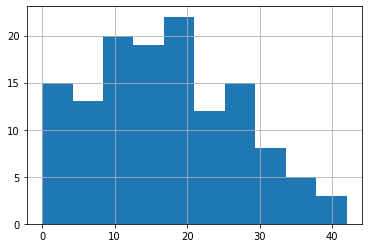

In [103]:
df['stress_calculation'].hist()

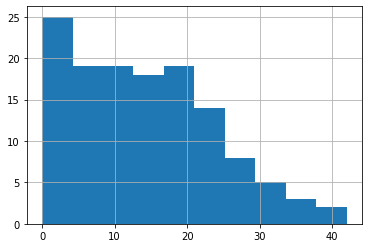

In [104]:
df['depression_calculation'].hist()

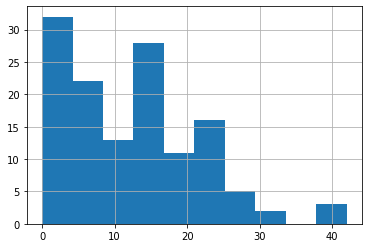

In [105]:
df['anxiety_calculation'].hist()

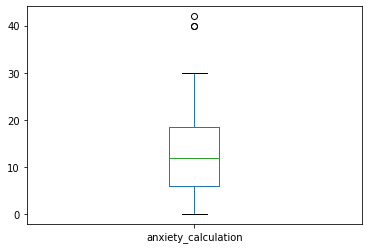

In [106]:
df['anxiety_calculation'].plot(kind='box')

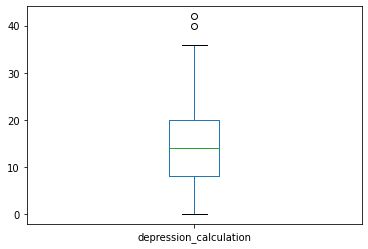

In [107]:
df['depression_calculation'].plot(kind='box')

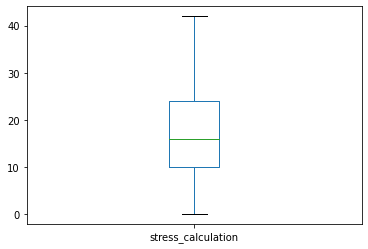

In [108]:
df['stress_calculation'].plot(kind='box')

In [109]:
adf=df

In [110]:
arr =  adf['anxiety_calculation'].to_numpy()


In [78]:
df

131

In [117]:

from scipy import stats
import numpy as np

arr =  adf['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

arr =  adf['stress_calculation'].to_numpy()
alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


Alpha=0.05 significance level = 5% 
15.388954227898976 , 18.73225789331315
Alpha=0.1 significance level = 10%
15.660771832867884 , 18.46044028834424


In [118]:

from scipy import stats
import numpy as np

arr =  adf['anxiety_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

arr =  adf['anxiety_calculation'].to_numpy()
alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


Alpha=0.05 significance level = 5% 
11.075104855803463 , 14.19762241692381
Alpha=0.1 significance level = 10%
11.328972087104434 , 13.94375518562284


In [119]:
from scipy import stats
import numpy as np

arr =  adf['depression_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

arr =  adf['depression_calculation'].to_numpy()
alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

12.822872347682171 , 16.055915531105708
Alpha=10 values
13.085725544049055 , 15.793062334738824


In [154]:
e_df=adf.loc[adf['City of Work'] == 'Lahore']
from scipy import stats
import numpy as np

print('DASS21 Lahore')
print("Stress")
arr = e_df['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['anxiety_calculation'].to_numpy()

print("")
print("Anxiety")


alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['depression_calculation'].to_numpy()

print("")

print( "Depression" )

alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


DASS21 Lahore
Stress
Alpha=0.05 significance level = 5% 
7.332539785141239 , 21.810317357715903
Alpha=0.1 significance level = 10%
8.63744602491687 , 20.505411117940273

Anxiety
Alpha=0.05 significance level = 5% 
5.628141372267535 , 17.514715770589607
Alpha=0.1 significance level = 10%
6.699498148138306 , 16.443358994718835

Depression
5.498772649036028 , 15.644084493821115
Alpha=10 values
6.413186526743875 , 14.729670616113268


In [153]:
Rwp_ISB_df=adf.loc[(adf['City of Work'] == 'Rawalpindi' ) | (adf['City of Work'] == 'Islamabad')]
e_df=Rwp_ISB_df
from scipy import stats
import numpy as np

print("DASS21 Rawalpindi & Islamabad")
print("Stress")
arr = e_df['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['anxiety_calculation'].to_numpy()

print("")
print("Anxiety")


alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['depression_calculation'].to_numpy()

print("")

print( "Depression" )

alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


DASS21 Rawalpindi & Islamabad
Stress
Alpha=0.05 significance level = 5% 
16.722423623295978 , 21.544243043370688
Alpha=0.1 significance level = 10%
17.119908183520216 , 21.14675848314645

Anxiety
Alpha=0.05 significance level = 5% 
11.154539455417916 , 15.91212721124875
Alpha=0.1 significance level = 10%
11.546729106689709 , 15.519937559976958

Depression
12.686094992901587 , 18.18057167376508
Alpha=10 values
13.139029758161117 , 17.727636908505552


In [152]:
Multan_df=adf.loc[adf['City of Work'] == 'Multan']
e_df=Multan_df
from scipy import stats
import numpy as np
print("DASS21 Multan")
print("Stress")
arr = e_df['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['anxiety_calculation'].to_numpy()

print("")
print("Anxiety")


alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['depression_calculation'].to_numpy()

print("")

print( "Depression" )

alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


DASS21 Multan
Stress
Alpha=0.05 significance level = 5% 
12.23171335895167 , 16.65717552993722
Alpha=0.1 significance level = 10%
12.602882506749808 , 16.28600638213908

Anxiety
Alpha=0.05 significance level = 5% 
9.20011437642242 , 14.133218956910913
Alpha=0.1 significance level = 10%
9.613860139552791 , 13.71947319378054

Depression
11.811357020169089 , 15.96642075760869
Alpha=10 values
12.159847507012172 , 15.617930270765607


In [151]:
e_df=adf.loc[adf['Gender'] == 'Male']
from scipy import stats
import numpy as np
print("DASS21 Gender:Male")
print("Stress")
arr = e_df['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['anxiety_calculation'].to_numpy()

print("")
print("Anxiety")


alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['depression_calculation'].to_numpy()

print("")

print( "Depression" )

alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


DASS21 Gender:Male
Stress
Alpha=0.05 significance level = 5% 
12.368557288982405 , 19.440966520541405
Alpha=0.1 significance level = 10%
12.95805220241858 , 18.851471607105232

Anxiety
Alpha=0.05 significance level = 5% 
8.521380478139704 , 15.002429045669821
Alpha=0.1 significance level = 10%
9.06158467719022 , 14.462224846619305

Depression
10.959043370314127 , 16.850480439209683
Alpha=10 values
11.450102650289885 , 16.359421159233925


In [150]:
e_df=adf.loc[adf['Gender'] == 'Female']
from scipy import stats
import numpy as np
print("DASS21 Gender:Female")
print("Stress")
arr = e_df['stress_calculation'].to_numpy()
alpha = 0.05                # significance level = 5%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) #

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")
lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # degress of freedom 
t = stats.t.ppf(1 - alpha/2, df) # t-critical value for 95% 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['anxiety_calculation'].to_numpy()

print("")
print("Anxiety")


alpha = 0.05                # significance level = 5%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)
print("Alpha=0.05 significance level = 5% ")

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=0.1 significance level = 10%")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           # 
t = stats.t.ppf(1 - alpha/2, df) # 

s = np.std(arr, ddof=1) # 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

arr =  e_df['depression_calculation'].to_numpy()

print("")

print( "Depression" )

alpha = 0.05                # significance level = 5%
df = len(arr) - 1          
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) # sample standard deviation
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)

print("Alpha=10 values")

alpha = 0.1                # significance level = 10%
df = len(arr) - 1           
t = stats.t.ppf(1 - alpha/2, df) 

s = np.std(arr, ddof=1) 
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))
print(lower,',', upper)


DASS21 Gender:Female
Stress
Alpha=0.05 significance level = 5% 
15.744423727831713 , 19.45557627216829
Alpha=0.1 significance level = 10%
16.047765955292412 , 19.15223404470759

Anxiety
Alpha=0.05 significance level = 5% 
11.283700762508989 , 14.8051881263799
Alpha=0.1 significance level = 10%
11.571540135364051 , 14.517348753524837

Depression
12.719940679380299 , 16.657837098397476
Alpha=10 values
13.041816500161932 , 16.335961277615844
